## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [4]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [5]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [6]:
df.query('converted == 1').count()[0]/df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [7]:
df.query("group == 'treatment' and landing_page != 'new_page' or group == 'control' and landing_page != 'old_page'").count()[0]

3893

In [8]:
df.query('group == "treatment" and landing_page != "new_page"').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 308 to 294252
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       1965 non-null   int64 
 1   timestamp     1965 non-null   object
 2   group         1965 non-null   object
 3   landing_page  1965 non-null   object
 4   converted     1965 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 92.1+ KB


f. Do any of the rows have missing values?

No

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
df.query("group == 'treatment' and landing_page != 'new_page' or group == 'control' and landing_page != 'old_page'").head()

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0


In [10]:
df2 = df.query("group == 'treatment' and landing_page == 'new_page' or group == 'control' and landing_page == 'old_page'")

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
df2.user_id.nunique()

290584

c. What is the row information for the repeat **user_id**? 

In [14]:
df2_duplicate = df2[df2.duplicated('user_id')]

In [15]:
df2_duplicate

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [16]:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
df2 = df2.drop_duplicates(subset=['user_id'])

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290584 non-null  int64 
 1   timestamp     290584 non-null  object
 2   group         290584 non-null  object
 3   landing_page  290584 non-null  object
 4   converted     290584 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [19]:
df2_duplicate = df2[df2.duplicated('user_id')]

In [20]:
df2_duplicate

,user_id,timestamp,group,landing_page,converted


In [21]:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [22]:
df2.query("converted == 1").count()[0] 

34753

In [23]:
df2.user_id.count()

290584

In [24]:
df2.query("converted == 1").count()[0] / df2.user_id.count()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [25]:
df2.query("group == 'control'").count()[0]

145274

In [26]:
df2.query("group == 'control' and converted == 1").count()[0] / df2.query("group == 'control'").count()[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [27]:
df2.query("group == 'treatment' and converted == 1").count()[0] / df2.query("group == 'treatment'").count()[0]

0.11880806551510564

d. What is the probability that an individual received the new page?

In [28]:
df2.query("landing_page == 'new_page'").count()[0] / df2.landing_page.count()

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

In [29]:
df2.query("landing_page == 'new_page' and converted == 1").count()[0] / df2.query("landing_page == 'new_page'").count()[0]

0.11880806551510564

In [30]:
df2.query("landing_page == 'new_page'").count()[0]

145310

**The probability that a new page leads to more conversions is similar to probability of converting regardless of the page. It is fair enough to conclue that new page dose not lead to more conversions. So I stay with the old page**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

H0 **$p_{old}$** >= **$p_{new}$**

H1 **$p_{old}$** < **$p_{new}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [31]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [32]:
conversion_rate_pnew = df2.converted.mean()

In [33]:
conversion_rate_pnew

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [34]:
conversion_rate_pold = df2.converted.mean()

In [35]:
conversion_rate_pold

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [36]:
treatment_group = df2.query('group == "treatment"')

In [37]:
treatment_group.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [38]:
nnew = treatment_group.query('landing_page == "new_page"').count()[0]

In [39]:
nnew

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [40]:
control_group = df2.query('group == "control"')

In [41]:
control_group.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0


In [42]:
nold = control_group.query('landing_page == "old_page"').count()[0]

In [43]:
nold

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [44]:
new_page_converted = np.random.binomial(1, conversion_rate_pnew, nnew)

In [45]:
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [46]:
old_page_converted = np.random.binomial(1, conversion_rate_pold, nold)

In [47]:
old_page_converted

array([0, 0, 0, ..., 1, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [48]:
new_page_converted.mean()

0.11966829536852247

In [49]:
old_page_converted.mean()

0.11933312223797789

In [50]:
observed_difference = new_page_converted.mean() - old_page_converted.mean()

In [51]:
observed_difference

0.0003351731305445832

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [52]:
p_diffs = []
new_page_converted = np.random.binomial(nnew, conversion_rate_pnew, 10000)/nnew
old_page_converted = np.random.binomial(nold, conversion_rate_pold, 10000)/nold

p_diffs = new_page_converted - old_page_converted

# p_diffs = []
# new_page_converted = np.random.binomial(nnew, conversion_rate_pnew, 10000)/nnew
# old_page_converted = np.random.binomial(nold, conversion_rate_pold, 10000)/nold

# p_diffs = new_page_converted - old_page_converted
# for _ in range(10000):
#    new_page_converted = np.random.binomial(1, conversion_rate_pnew, nnew).mean()
#    old_page_converted = np.random.binomial(1, conversion_rate_pold, nold).mean()

# p_diffs.append(new_page_converted - old_page_converted)

In [53]:
# p_diffs = np.array(p_diffs)

In [54]:
p_diffs

array([-0.00167454,  0.0018977 , -0.00033945, ..., -0.00088293,
       -0.00015361, -0.00024959])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

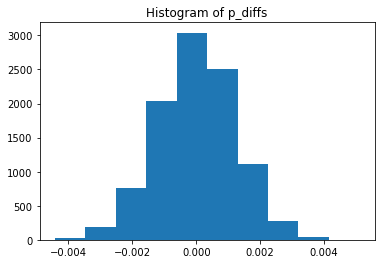

In [55]:
plt.title("Histogram of p_diffs")
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [56]:
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

In [57]:
null_vals

array([ 2.82723983e-06, -3.19832773e-04, -1.22677517e-03, ...,
        2.06735022e-03, -3.73119564e-04, -2.32743988e-03])

In [58]:
control_prob = df2.query("group == 'control' & converted ==1").count()[0]/ df2.query("group == 'control'").count()[0]

In [59]:
control_prob

0.1203863045004612

In [60]:
treatment_prob = df2.query("group == 'treatment' & converted ==1").count()[0]/ df2.query("group == 'treatment'").count()[0]

In [61]:
treatment_prob

0.11880806551510564

In [62]:
obs_diff = treatment_prob - control_prob


In [63]:
obs_diff

-0.0015782389853555567

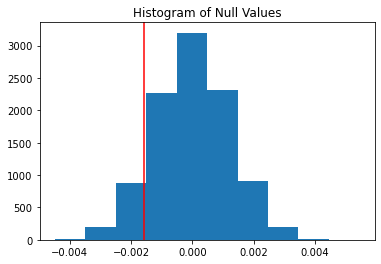

In [64]:
plt.title("Histogram of Null Values")
plt.hist(null_vals);
plt.axvline(x = obs_diff, color='red');

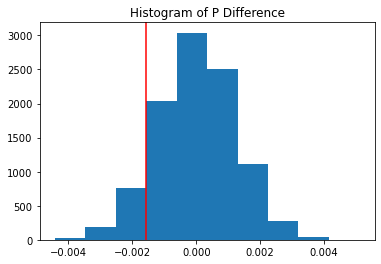

In [65]:
plt.title("Histogram of P Difference")
plt.hist(p_diffs);
plt.axvline(x = obs_diff, color='red');

In [66]:
(p_diffs > obs_diff).mean()

0.9044

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**
<br>
The null values, p differnce value are calculated and compared against observed difference.
<br>
The p-difference is greater than the observed difference
The values are from the null.
I fail to reject the null

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [67]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [68]:
df2.query('landing_page == "new_page" and converted == 1').count()[0]

17264

In [69]:
df2.query('landing_page == "old_page" and converted == 1').count()[0]

17489

In [70]:
df2.query('landing_page == "old_page"').count()[0]

145274

In [71]:
df2.query('landing_page == "new_page"').count()[0]

145310

In [72]:
# from pandas.core import datetools

import statsmodels.api as sm


convert_old = df2.query('landing_page == "new_page" and converted == 1').count()[0]
convert_new = df2.query('landing_page == "old_page" and converted == 1').count()[0]
n_old = df2.query('landing_page == "old_page"').count()[0]
n_new = df2.query('landing_page == "new_page"').count()[0]

In [73]:
count_array = np.array([convert_new, convert_old])

In [74]:
type(count_array)

numpy.ndarray

In [75]:
convert_new

17489

In [76]:
convert_old

17264

In [77]:
type(count_array)

numpy.ndarray

In [78]:
nobs_array = np.array([n_old, n_new])

In [79]:
n_old # number of rows associated with old pages

145274

In [80]:
n_new # number of rows associated with new pages

145310

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [81]:
z_score, p_value = sm.stats.proportions_ztest(count_array, nobs_array, alternative='smaller')

In [82]:
z_score

1.3109241984234394

In [83]:
p_value

0.9050583127590245

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**
<br>
- P value is greater than the type 1 error
I fail to reject the null hypothesis
<br>
- The z-score & p-value is based on the count array, number of rows associated with new and old pages. It is based on condition alternative is smaller
<br>
- In the previous section p-value is based on the reduction from observed difference


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**
<br>
Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [84]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [85]:
df2['intercept'] = 1 # Adding an intercept column

In [86]:
df2.head() # dataframe with intercept column

,user_id,timestamp,group,landing_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1


In [87]:
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment'] # adding ab_page column

In [88]:
df2.head() # dataframe with intercept and ab_page column

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [89]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2022-01-02 20:50 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

The z-value for the model is -1.3109. The p-value for the model is 0.1899

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?
<br><br>
The p-value is same as that of found in stats.proportions.ztest. But the p-value is different from the one found in part II section j 

**Put your answer here.**
The p-value is 0.1899
<br>

In Logestic regression the H0 & H1 (null & alternative) are as follows

H0 **$p_{old}$** == **$p_{new}$**

H1 **$p_{old}$** **$ \neq  $** **$p_{new}$**

<br>

In previous section the H0 & H1 (null & alternative) are as follows

H0 **$p_{old}$** >= **$p_{new}$**

H1 **$p_{old}$** < **$p_{new}$**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**
<br>
It is good to add landing page into the regression model
Over fitting or under fitting might occur. It can be solved by model diagnosis

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [90]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2022-01-02 20:51 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

In [91]:
df3 = pd.read_csv("countries.csv")

In [92]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [93]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290584 non-null  int64 
 1   timestamp     290584 non-null  object
 2   group         290584 non-null  object
 3   landing_page  290584 non-null  object
 4   converted     290584 non-null  int64 
 5   intercept     290584 non-null  int64 
 6   ab_page       290584 non-null  uint8 
dtypes: int64(3), object(3), uint8(1)
memory usage: 15.8+ MB


In [94]:
df3.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [95]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290584 entries, 0 to 290583
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  290584 non-null  int64 
 1   country  290584 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.4+ MB


In [96]:
df3['country'].nunique()

3

In [97]:
df3['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [98]:
df2 =df2.join(df3.set_index('user_id'), on='user_id') 

In [99]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [100]:
df2[['country_CA', 'country_UK', 'country_US']] = pd.get_dummies(df2['country'])

In [101]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,country_CA,country_UK,country_US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [102]:
df2['ab_UK'] = df2['ab_page'] * df2['country_UK']
df2['ab_US'] = df2['ab_page'] * df2['country_US']
df2['ab_CA'] = df2['ab_page'] * df2['country_CA']

In [103]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,country_CA,country_UK,country_US,ab_UK,ab_US,ab_CA
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,0,0,0


In [104]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'country_UK', 'country_US', 'ab_UK', 'ab_US']])

In [105]:
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [106]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2022-01-02 20:51 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
country_UK     0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
country_US     0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
ab_UK          0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
ab_US          0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
==================================================================

"""

In [107]:
np.exp(results.params) # Taking exponential 

intercept     0.134794
ab_page       0.934776
country_UK    1.011854
country_US    1.017682
ab_UK         1.081428
ab_US         1.048001
dtype: float64

In [108]:
1/np.exp(results.params) # Taking inverse

intercept     7.418713
ab_page       1.069775
country_UK    0.988285
country_US    0.982625
ab_UK         0.924703
ab_US         0.954198
dtype: float64

In [109]:
df2.groupby('country').mean()['converted'] # Grouping by conversion rate

country
CA    0.115318
UK    0.120594
US    0.119547
Name: converted, dtype: float64

Most of the conversions belong to UK

- The P_value of UK is 0.7674
- The P_value of US is 0.6418
- The P_value for ab_UK is 0.1681
- The P_value of ab_US is 0.3833

## Conclusion

The P-value suggests that there is strong correlation between ab_page and country.

The Logistic regression is very helpful since conversion rate for various countries can be found & it's corresponding p-value can be found

Overall the p_values suggest that it is better to stay with the null. I choose to not reject the null in favour of the alternative


<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [110]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0